In [2]:
import os
import shutil
import mido
# 源文件夹路径
source_folder = './tgt_dataset/'

for root,folders,files in os.walk(source_folder):
    for filename in files:
        if filename=='5.mid':  # 检查文件后缀是否为.mid
            mid = mido.MidiFile(f"{source_folder}{filename}")
            for i, track in enumerate(mid.tracks):#enumerate()：创建索引序列，索引初始为0
                print('Track {}: {}'.format(i, track.name))
                for msg in track:#每个音轨的消息遍历
                    if msg.type=='program_change':
                        print(msg)

Track 0: 0000-00708091.MID
Track 1: 0100-EX
Track 2: EF
Track 3: 1109-DRUMS 1
program_change channel=9 program=0 time=1
Track 4: 110A-DRUMS2
program_change channel=9 program=0 time=1
Track 5: 1501-BASS
program_change channel=1 program=33 time=1
Track 6: 1303-MELODY 1
program_change channel=3 program=73 time=1
Track 7: 1604-PIANO
program_change channel=4 program=1 time=1
Track 8: 1605-SAX
program_change channel=5 program=65 time=1
Track 9: 1606-STR
program_change channel=6 program=48 time=1
Track 10: 1607-GT1
program_change channel=7 program=25 time=1
Track 11: 1608-OVGT
program_change channel=8 program=29 time=1
Track 12: 1600-SOLOGT
program_change channel=0 program=30 time=1
Track 13: 160B-GT2
program_change channel=11 program=30 time=1
Track 14: 160C-STR2
program_change channel=12 program=48 time=1
Track 15: 160D-SOLOGT2
program_change channel=13 program=30 time=1
Track 16: 160E-PIANO2
program_change channel=14 program=4 time=1
Track 17: 160F-PAD
program_change channel=15 program=94 

In [1]:
#统计一个midi文件中使用的乐器（音色）种类数
def count_instruments(midiFile_path):
    instruments_set=set() #使用集合防止同一种乐器被记录两次
    mid = mido.MidiFile(midiFile_path)
    for i, track in enumerate(mid.tracks):
        for msg in track:#每个音轨的消息遍历
            #鼓的轨道默认为9较为特殊因此单独处理
            #先处理非鼓的轨道
            if msg.type=='program_change' and msg.channel!=9: 
                instruments_set.add((msg.program))
            #再处理鼓的轨道
            if msg.type=='program_change' and msg.channel==9: 
                instruments_set.add(-1) #-1代表使用了乐器鼓
    return len(instruments_set)

In [4]:
try:
    count_instruments(f"{source_folder}110753.mid")
except:
    print(1)

1


In [5]:
from tqdm import tqdm

source_folder = './tgt_dataset/'

all_instruments=[]
errors=0
for root,folders,files in os.walk(source_folder):
    for filename in tqdm(files, desc="Processing", unit="midi"):
        try:
            all_instruments.append(count_instruments(f"{source_folder}{filename}"))
        except:
            errors=errors+1
print(errors)

Processing: 100%|███████████████████| 244358/244358 [1:55:26<00:00, 35.28midi/s]

9184


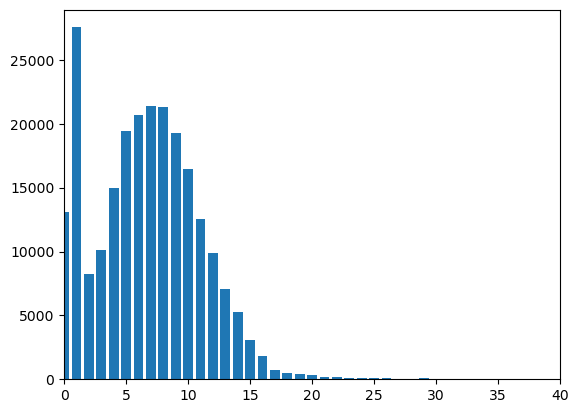

[(0, 13085),
 (1, 27551),
 (2, 8238),
 (3, 10133),
 (4, 14982),
 (5, 19455),
 (6, 20724),
 (7, 21393),
 (8, 21336),
 (9, 19258),
 (10, 16473),
 (11, 12511),
 (12, 9901),
 (13, 7040),
 (14, 5234),
 (15, 3082),
 (16, 1796),
 (17, 726),
 (18, 502),
 (19, 376),
 (20, 310),
 (21, 200),
 (22, 204),
 (23, 99),
 (24, 76),
 (25, 86),
 (26, 86),
 (27, 20),
 (28, 54),
 (29, 67),
 (30, 18),
 (31, 23),
 (32, 12),
 (33, 35),
 (34, 20),
 (35, 5),
 (36, 15),
 (37, 3),
 (38, 16),
 (39, 1),
 (43, 2),
 (44, 6),
 (46, 8),
 (50, 3),
 (51, 1),
 (61, 2),
 (62, 4),
 (87, 2)]

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
instrument_counts=Counter(all_instruments)
keys=list(instrument_counts.keys())
values=list(instrument_counts.values())

plt.bar(keys, values)
plt.xlim(0, 40)

# 显示柱状图
plt.show()
sorted_instrument_counts=sorted(instrument_counts.items())
sorted_instrument_counts

In [50]:
tgt_midi=[item[1] for item in sorted_instrument_counts]
print(sum(tgt_midi[5:16]))

156407


[19455, 20724, 21393, 21336, 19258, 16473, 12511, 9901, 7040, 5234, 3082]

In [3]:
import os
import shutil
import mido
from tqdm import tqdm

source_folder = './tgt_dataset/'
tgt_folder='./tgt_dataset_v2/'

i=0
for root,folders,files in os.walk(source_folder):
    for filename in tqdm(files, desc="Processing", unit="midi"):
        try:
            source_file=f"{source_folder}{filename}"
            destination_file = f"{tgt_folder}{i}.mid"
            instruments_num=count_instruments(source_file)
            if instruments_num>=5 and instruments_num<=15:
                shutil.copy(source_file, destination_file)
                i=i+1
        except:
            pass
print(i)

Processing: 100%|███████████████████| 244358/244358 [1:51:47<00:00, 36.43midi/s]

156407
